# The Hill Estimator

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from utils.functions import hill_estimator

## Load S&P 500 Data and Split into Gains and Losses

We start off by loading the given S&P data. The data is read correctly by stacking the rows togehter into one single column.

We focus on both tails of the distributions. The left tail represents the losses, however, it is common to present the tail-index estimators for positive data. Therefore we will multiply the losses $X_i < 0$ by minus one, swapping the negative with the positive values. On the other hand; the right tail represents the gains $X_i >0$, and we simply keep these positive values.

With increasing $k$ (number of order statistics) the Hill estimator is stabilizing. And the question is which $k$ gives a reasnable estimation of $\kappa$. One might say that a good approximation of $\kappa$ lies a region where the graph is stable. 

If looking at the graphs (for all $k$) for __both__ the __gains__ and __losses__ they do not show any extensive stable area of estimates. However, when looking at the zoomed in upper parts (for $k=10,...,0.1\cdot n)$ they gives a much better picture. At some places the estimates seem to gain stability. 

For the __gains__ (right tail) a stable area could indicate an estimate around $\kappa=2.6$, but it is still not that clear because of the volatibility of the plot is still not adequately tamed.

For the __losses__ (left tial) one might say that a somewhat reasonable approximation could be $\kappa=2.5$, but, as for opposite tail, the volatibility is not tamed and so it is not straightforward to get a good read on the estimation.


__*Note*__: Code have been runned on a CPU.

In [3]:
""" Load S&P Data and split into gains (X_i > 0) and losses (X_i < 0) """
# Load S&P time series (as a dataframe):
df_dummy = pd.read_csv('./data/sp500.txt', sep=" ", header=None, skiprows=1)
df_dummy

# stick the rows togehter into one long column..:
df_sp = df_dummy.stack().reset_index()                           # stack data (rows upon rows as one long column)
df_sp.drop(['level_0', 'level_1'], axis=1, inplace=True)         # drop unnecessary columns 
df_sp.columns = ['Stacked Returns (%)']                          # rename column name for our stacked data.. 

# Split into gains and losses:
df_sp['Gains'] = df_sp['Stacked Returns (%)'].where(df_sp['Stacked Returns (%)'] > 0)
df_sp['Losses'] = df_sp['Stacked Returns (%)'].where(df_sp['Stacked Returns (%)'] < 0)

df_sp

,Stacked Returns (%),Gains,Losses
0,-0.002255,NaN,-0.002255
1,-0.009640,NaN,-0.009640
2,0.006248,0.006248,NaN
3,0.001132,0.001132,NaN
4,-0.010233,NaN,-0.010233
...,...,...,...
19255,-0.007341,NaN,-0.007341
19256,-0.021279,NaN,-0.021279
19257,-0.004438,NaN,-0.004438
19258,-0.019362,NaN,-0.019362


In [4]:
""" Remove NaN values (empty rows) and compute the gains """
# Construct new dataframe for gains:
df_sp_gains = df_sp[['Gains']].copy()
# Remove empty cells:
df_sp_gains.dropna(subset = ['Gains'], inplace=True)
# Reset dataframe index:
df_sp_gains.reset_index(drop=True, inplace=True)

df_sp_gains

,Gains
0,0.006248
1,0.001132
2,0.006893
3,0.006277
4,0.000578
...,...
10384,0.017744
10385,0.009297
10386,0.021857
10387,0.009375


In [5]:
""" Remove NaN values (empty rows) and compute the losses multiplied by -1 """
# Construct new dataframe for losses:
df_sp_loss = df_sp[['Losses']].copy()
# Remove empty cells:
df_sp_loss.dropna(subset = ['Losses'], inplace=True)
# Multiply all values by -1:
df_sp_loss['Losses'] = df_sp_loss['Losses'] * (-1)
# Reset dataframe index:
df_sp_loss.reset_index(drop=True, inplace=True)

df_sp_loss

,Losses
0,0.002255
1,0.009640
2,0.010233
3,0.007456
4,0.001152
...,...
8866,0.012520
8867,0.007341
8868,0.021279
8869,0.004438


## Hill Estimator for Gains

In [6]:
""" Compute Hill Estimator for Gains """

n_obs = len(df_sp_gains['Gains'])
k_max = int(round(0.1*n_obs))
k_min = 10

print("[INFO] computing Hill Estimators...")
t0 = time()

kap_gains = hill_estimator(df_sp_gains['Gains'].to_numpy())

print ("        done in %0.3f minutes" % ((time() - t0)/60))
print ("")

print ("Sample size n:", n_obs)
print ("Total number of exceeded k:", len(kap_gains))

[INFO] computing Hill Estimators...
        done in 6.299 minutes

Sample size n: 10389
Total number of exceeded k: 10388


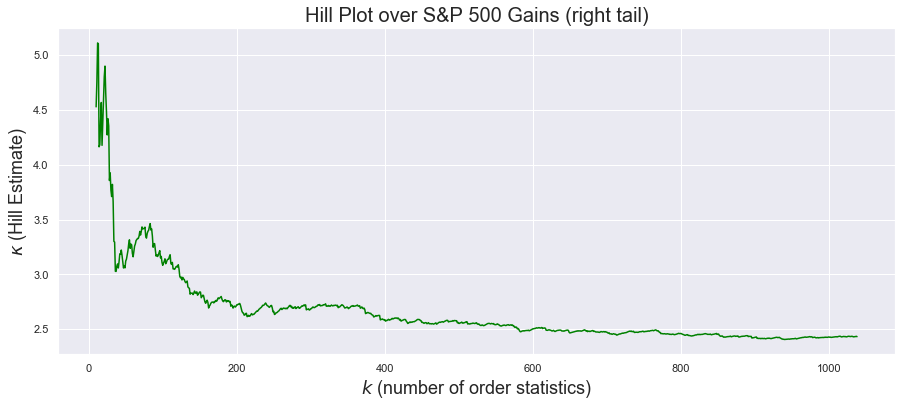

In [7]:
""" Hill Plot for Gains for k in range (10,...,round(0.1*n_obs)) """

plt.figure(figsize=(15, 6))
plt.plot(np.arange(k_min,k_max), kap_gains[k_min-1:k_max-1], 'green')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\kappa$ (Hill Estimate)", fontsize=18)
plt.title("Hill Plot over S&P 500 Gains (right tail)", fontsize=20)
plt.show()

## Hill Estimator for Losses

In [8]:
""" Compute Hill Estimator for Losses """

print("[INFO] computing Hill Estimators...")
t0 = time()

n_obs = len(df_sp_loss['Losses'])
k_max = int(round(0.1*n_obs))
k_min = 10

kap_loss = hill_estimator(df_sp_loss['Losses'].to_numpy())

print ("        done in %0.3f minutes" % ((time() - t0)/60))
print ("")

print ("Sample size n:", n_obs)
print ("Total # of exceeded k:", len(kap_loss))

[INFO] computing Hill Estimators...
        done in 4.616 minutes

Sample size n: 8871
Total # of exceeded k: 8870


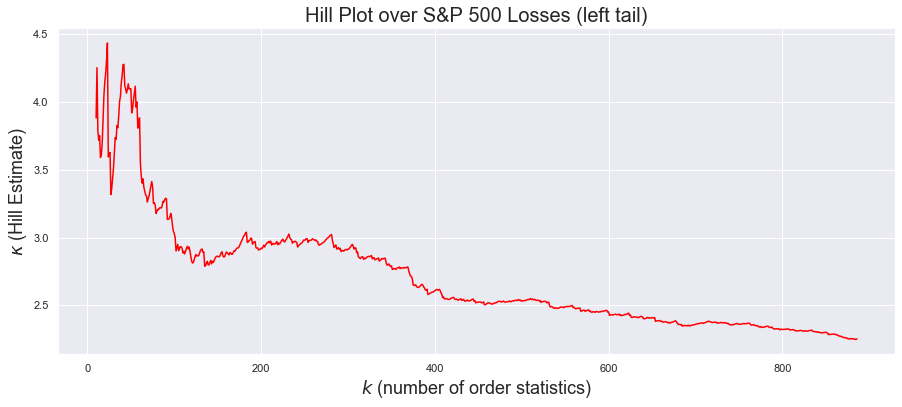

In [9]:
""" Hill Plot for Losses for k in range (10,...,round(0.1*n_obs)) """

plt.figure(figsize=(15, 6))
plt.plot(np.arange(k_min,k_max), kap_loss[k_min-1:k_max-1], 'red')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\kappa$ (Hill Estimate)", fontsize=18)
plt.title("Hill Plot over S&P 500 Losses (left tail)", fontsize=20)

plt.show()